In [1]:
import Axelrod_Sim as axel
import Strategy as st
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm

In [84]:
Payoff_Matrix = np.array([                      
    [3, 0, -4],
    [5, 1, -4],
    [0, 0, -2],
])

Generations = 300
Months = 5

In [26]:
def Generate_H2h_Matrix(Time, Payoff_Matrix):
    #Generates a matrix of head to head values between strategies
    Strats = st.Get_All_Strats()
    H2H_Matrix = []
    Player_Results = []
    X = 0
    for Result in axel.Full_Game(Time, Payoff_Matrix)[1]: 
        Player_Results.append(Result[0])
        X += 1
        if X == len(Strats):
            H2H_Matrix.append(Player_Results)
            X = 0
            Player_Results = []
    return(np.array(H2H_Matrix))



In [46]:
def Get_Fitness(Payoff_Matrix, population):
    Fitness_Vec = []
    for x in range(len(Payoff_Matrix[0])):
        Fitness = 0
        for y in range(len(Payoff_Matrix[0])):
            if y == x:
                Fitness += (population[y]-1)*(Payoff_Matrix[x])[y]
            else:
                Fitness += population[y]*(Payoff_Matrix[x])[y]
        Fitness = Fitness/(np.sum(population)-1)
        Fitness_Vec.append(np.exp(0.04*(Fitness)))
    return(np.array(Fitness_Vec))

In [72]:
def Run_Sim(Time, Payoff_Matrix, Generations):
    #runs the moran process simulation
    H2H_Matrix = Generate_H2h_Matrix(Time, Payoff_Matrix)
    Population = []
    Selection_Values_Duplication = np.zeros(len(H2H_Matrix[0]))
    Selection_Values_Removal = np.zeros(len(H2H_Matrix[0]))
    for x in range(len(H2H_Matrix[1])):
        Population.append(3)
    Population = np.array(Population)
    Population_Over_Time = [0 for b in range(Generations)]
    for x in range(Generations):
        Fitness = Get_Fitness(H2H_Matrix, Population)
        for i in range(len(H2H_Matrix[0])):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(len(H2H_Matrix[0])):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([b for b in range(len(Population))], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([l for l in range(len(Population))], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1
        Population_Over_Time[x] = Population.tolist()
    return(Population_Over_Time)
    

In [48]:
def Display_Results(Data, Generations):
    Names = st.Get_All_Names()
    colour = iter(cm.rainbow(np.linspace(0, 1, len(Data[0]))))
    x = [i for i in range(Generations)]
    for k in range(len(Data[0])):
        c = next(colour)
        y = [(Data[i])[k] for i in range(Generations)]
        plt.plot(x, y, color = c, label = Names[k])
    plt.xlabel("Generations")
    plt.ylabel("Population")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show

In [92]:
def Get_Average_Result(Months, Payoff_Matrix, Generations):
    #Gets an average result from the 
    Results = []
    Average_Pop_Over_Time = []
    for x in range(50):
        Results.append(Run_Sim(Months, Payoff_Matrix, Generations))
    for Agreement in range(Generations):
        temp_Generation = []
        for Strategy in range(len(Results[0][0])):
            s = 0
            for Sim in Results:
                s += Sim[Agreement][Strategy]
            temp_Generation.append(s/len(Results))
        Average_Pop_Over_Time.append(temp_Generation)
    Names = st.Get_All_Names()
    colour = iter(cm.rainbow(np.linspace(0, 1, len(Names))))
    x = [i for i in range(Generations)]
    print(Average_Pop_Over_Time)
    for k in range(len(Average_Pop_Over_Time[0])):
        c = next(colour)
        y = [Average_Pop_Over_Time[i][k] for i in range(Generations)]
        plt.plot(x, y, color = c, label = Names[k])
    plt.xlabel("Generations")
    plt.ylabel("Population")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show
    

            


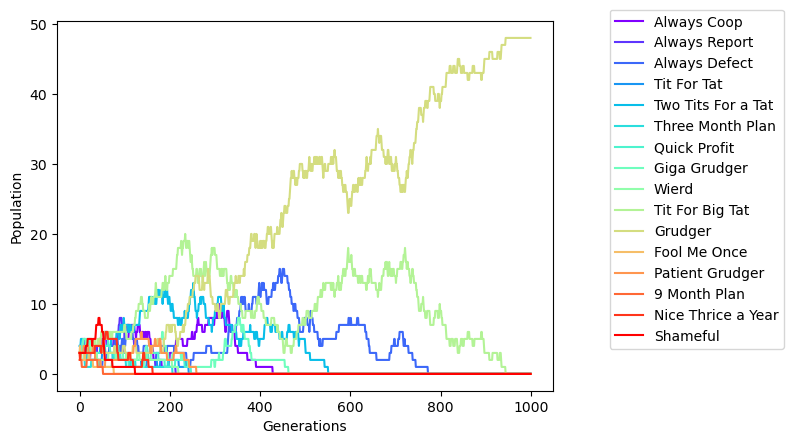

In [81]:
Moran_Sim_Result = Run_Sim(Months, Payoff_Matrix, Generations)
Display_Results(Moran_Sim_Result, Generations)

[[2.9, 3.0, 3.02, 3.0, 3.0, 2.9, 3.02, 3.0, 2.98, 3.1, 2.98, 2.98, 3.14, 3.06, 2.96, 2.96], [2.94, 2.96, 3.0, 2.98, 2.98, 2.92, 3.08, 2.92, 3.08, 3.1, 2.9, 2.9, 3.22, 3.04, 2.96, 3.02], [2.92, 2.92, 3.04, 3.0, 2.92, 2.94, 3.12, 2.98, 3.16, 3.02, 2.94, 2.94, 3.18, 3.02, 2.92, 2.98], [2.9, 2.94, 3.06, 2.9, 2.96, 2.86, 3.1, 2.98, 3.14, 3.1, 3.02, 2.96, 3.2, 3.02, 2.96, 2.9], [2.88, 2.88, 3.14, 2.9, 2.92, 2.78, 3.14, 3.0, 3.26, 3.08, 3.04, 2.9, 3.16, 3.0, 2.96, 2.96], [2.92, 2.86, 3.18, 2.82, 2.86, 2.76, 3.14, 3.04, 3.24, 3.06, 3.02, 2.84, 3.18, 3.1, 3.06, 2.92], [2.9, 2.92, 3.16, 2.7, 2.84, 2.72, 3.18, 3.08, 3.18, 3.12, 3.04, 2.82, 3.2, 3.12, 3.12, 2.9], [2.92, 2.92, 3.2, 2.64, 2.82, 2.76, 3.06, 3.04, 3.24, 3.16, 3.04, 2.84, 3.22, 3.12, 3.12, 2.9], [2.88, 2.96, 3.18, 2.68, 2.92, 2.72, 3.08, 3.04, 3.28, 3.12, 2.96, 2.8, 3.2, 3.12, 3.1, 2.96], [2.86, 2.94, 3.26, 2.76, 2.88, 2.72, 3.12, 3.06, 3.18, 3.12, 2.96, 2.76, 3.24, 3.08, 3.08, 2.98], [2.86, 2.9, 3.28, 2.76, 2.88, 2.76, 3.14, 3.12, 3.1

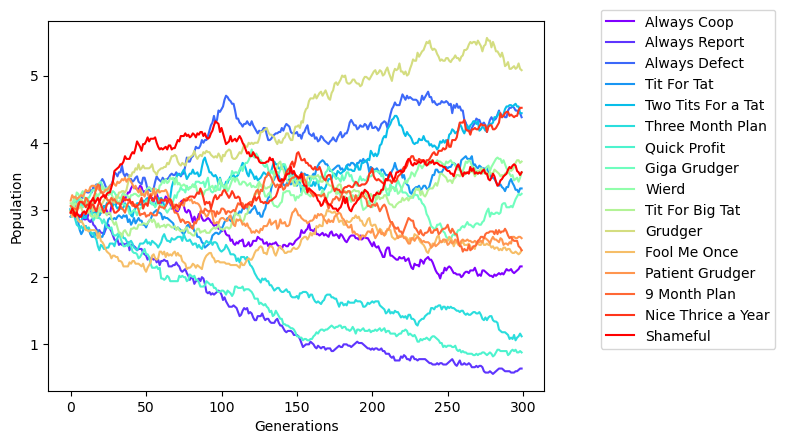

In [95]:
Get_Average_Result(Months, Payoff_Matrix, Generations)


[[3.0, 2.88, 3.0, 3.02, 3.02, 3.02, 3.0, 3.04, 3.0, 3.0, 3.0, 2.98, 3.02, 2.98, 3.06, 2.98], [2.92, 2.92, 3.08, 3.04, 3.12, 3.04, 2.96, 3.1, 3.02, 2.94, 2.96, 3.04, 2.96, 2.96, 3.0, 2.94], [2.94, 2.94, 3.12, 3.0, 3.12, 3.08, 2.98, 3.04, 3.04, 2.94, 2.9, 3.04, 3.0, 2.98, 2.9, 2.98], [3.0, 2.9, 3.08, 2.96, 3.1, 3.06, 2.96, 3.04, 3.04, 2.9, 2.96, 3.0, 3.0, 3.02, 3.0, 2.98], [2.92, 2.86, 3.12, 3.02, 3.06, 2.98, 2.92, 3.04, 3.1, 2.94, 2.98, 2.84, 3.06, 3.04, 3.08, 3.04], [2.94, 2.72, 3.24, 3.02, 3.14, 2.96, 2.88, 2.96, 3.1, 2.94, 2.94, 2.88, 2.96, 3.1, 3.12, 3.1], [2.94, 2.72, 3.34, 3.02, 3.14, 2.88, 2.88, 2.96, 3.06, 2.84, 3.0, 2.94, 2.92, 3.08, 3.16, 3.12], [2.98, 2.74, 3.34, 3.04, 3.14, 2.98, 2.84, 2.86, 3.08, 2.78, 2.98, 2.94, 2.96, 3.02, 3.16, 3.16], [2.92, 2.76, 3.34, 3.06, 3.2, 3.0, 2.82, 2.86, 3.06, 2.72, 3.04, 2.94, 2.92, 3.04, 3.18, 3.14], [2.88, 2.72, 3.38, 3.08, 3.2, 2.96, 2.8, 2.82, 3.08, 2.74, 3.04, 2.92, 2.92, 3.06, 3.26, 3.14], [2.92, 2.7, 3.32, 2.98, 3.2, 3.0, 2.86, 2.84, 3

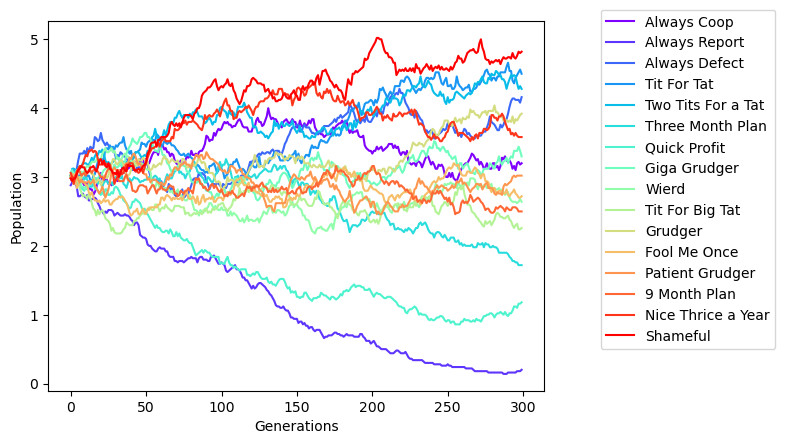

In [96]:
Get_Average_Result(Months, Payoff_Matrix, Generations)

[[3.0, 2.92, 2.96, 3.04, 2.98, 2.98, 2.98, 3.08, 3.06, 2.92, 3.04, 3.04, 2.96, 3.02, 3.02, 3.0], [2.94, 2.88, 3.04, 3.06, 3.0, 3.06, 2.98, 3.02, 3.06, 2.82, 3.1, 3.04, 2.94, 3.0, 3.06, 3.0], [2.92, 2.82, 3.0, 3.06, 2.98, 3.14, 2.88, 3.02, 3.04, 2.86, 3.1, 3.1, 3.02, 2.96, 3.1, 3.0], [2.92, 2.7, 3.08, 2.98, 3.04, 3.2, 2.86, 3.08, 3.02, 2.82, 3.06, 3.08, 3.04, 2.92, 3.16, 3.04], [2.88, 2.68, 3.08, 3.02, 3.1, 3.24, 2.92, 3.04, 3.06, 2.86, 3.06, 3.02, 3.06, 2.86, 3.12, 3.0], [2.9, 2.64, 3.06, 3.04, 3.06, 3.2, 2.94, 3.08, 3.06, 2.82, 2.98, 3.06, 3.16, 2.94, 3.04, 3.02], [2.9, 2.66, 3.04, 2.98, 3.16, 3.24, 2.9, 3.04, 3.06, 2.78, 3.0, 2.98, 3.24, 2.94, 3.02, 3.06], [2.88, 2.7, 3.08, 2.98, 3.14, 3.24, 2.88, 3.04, 3.02, 2.76, 2.98, 2.9, 3.26, 2.98, 3.04, 3.12], [2.84, 2.7, 3.1, 3.02, 3.18, 3.22, 2.88, 3.0, 3.0, 2.72, 2.94, 2.88, 3.16, 3.02, 3.14, 3.2], [2.98, 2.7, 3.04, 3.02, 3.18, 3.28, 2.86, 3.04, 2.96, 2.82, 2.94, 2.86, 3.18, 2.96, 3.04, 3.14], [3.0, 2.6, 3.0, 3.0, 3.16, 3.26, 2.88, 2.98, 2.

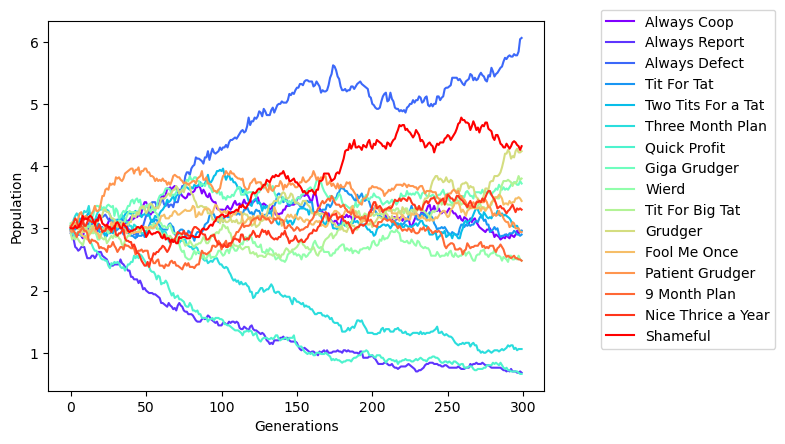

In [97]:
Get_Average_Result(Months, Payoff_Matrix, Generations)